# Computer Vision Thresholding

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

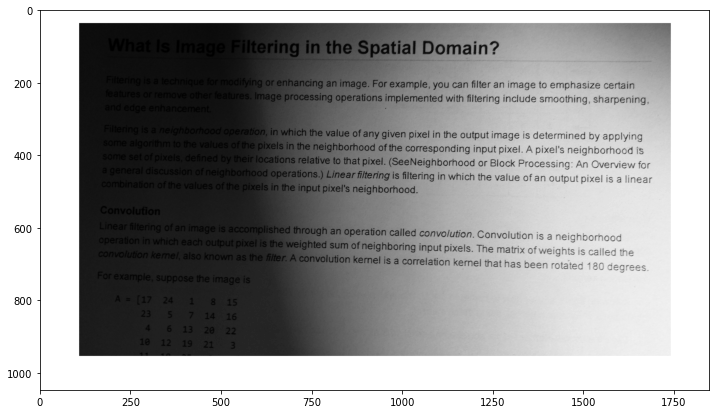

In [141]:
# Have a look at the 2 images below
text = cv2.imread('img/t1.png',0)
notes =cv2.imread('img/notes.png',0)
plt.figure(figsize = (12,10))
plt.imshow(notes,cmap='gray')


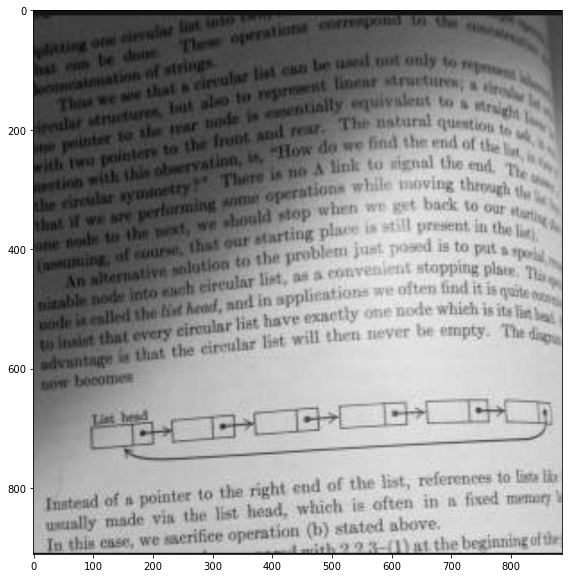

In [175]:
text_2 = cv2.imread('img/t2.png',0)
plt.figure(figsize = (12,10))
plt.imshow(text_2, cmap='gray')


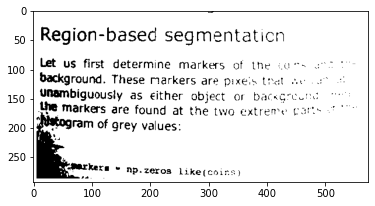

In [36]:
# Apply threshold to the images above to make them look better, try to find the best one
ret, th = cv2.threshold(text, 90, 255,cv2.THRESH_BINARY )
plt.imshow(th,cmap='gray')

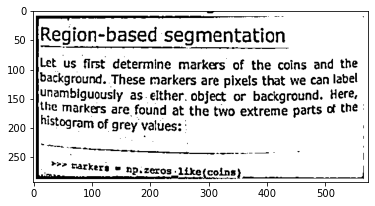

In [99]:
# new_text = cv2.cvtColor(text,cv2.COLOR_BGR2GRAY)
th_1 = cv2.adaptiveThreshold(text,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)
plt.imshow(th_1,cmap='gray')

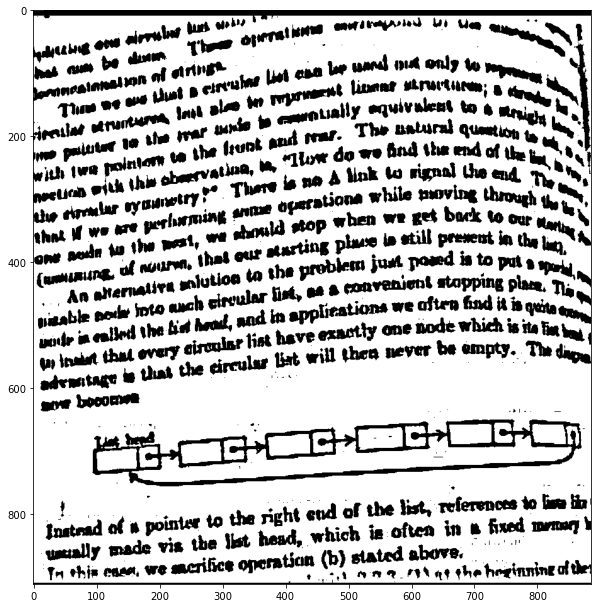

In [170]:
th_1 = cv2.adaptiveThreshold(text_2,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,4)
plt.figure(figsize=(10,12))
plt.imshow(th_1,cmap='gray')

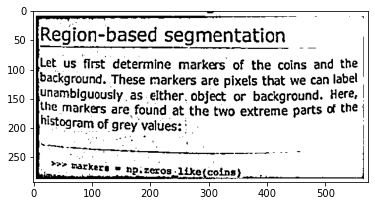

In [107]:
th_1_1 = cv2.adaptiveThreshold(text,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,19,7)
plt.imshow(th_1_1,cmap='gray')

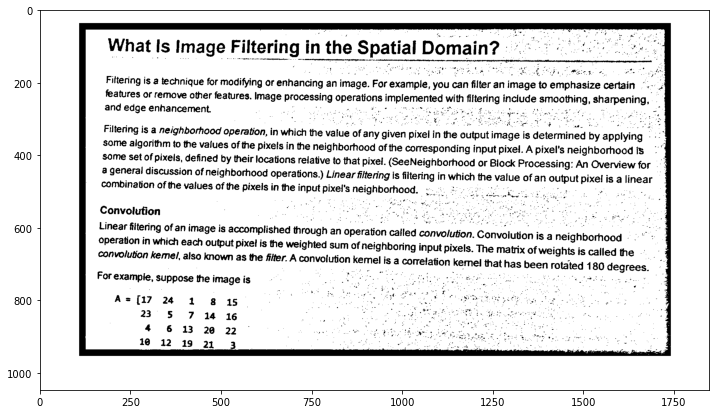

In [166]:
notes_th = cv2.adaptiveThreshold(notes,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,37,4)
plt.figure(figsize=(12,10))
plt.imshow(notes_th,cmap='gray')

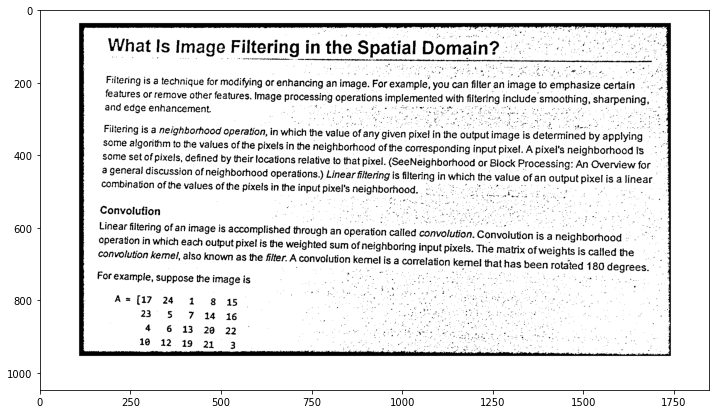

In [167]:
notes_th = cv2.adaptiveThreshold(notes,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,37,4)
plt.figure(figsize=(12,10))
plt.imshow(notes_th,cmap='gray')

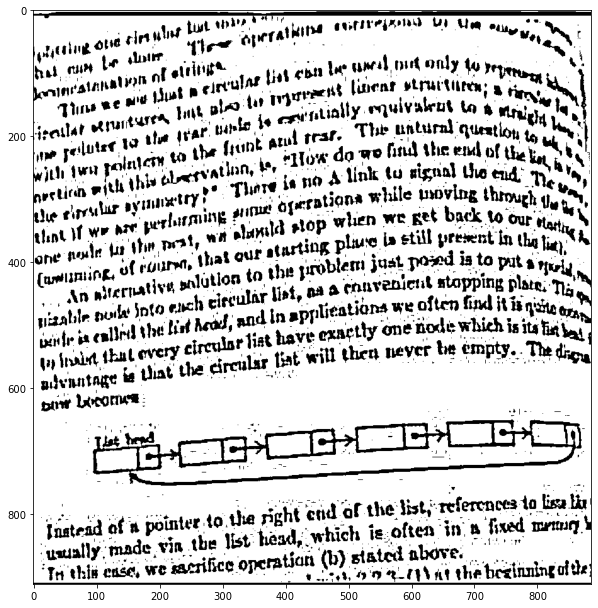

In [160]:
th_1_1 = cv2.adaptiveThreshold(text_2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,31,4)
plt.figure(figsize=(10,12))
plt.imshow(th_1_1,cmap='gray')

In [ ]:
# Try to apply adaptiveThreshold and see if that helps, use both ADAPTIVE_THRESH_MEAN_C and ADAPTIVE_THRESH_GAUSSIAN_C


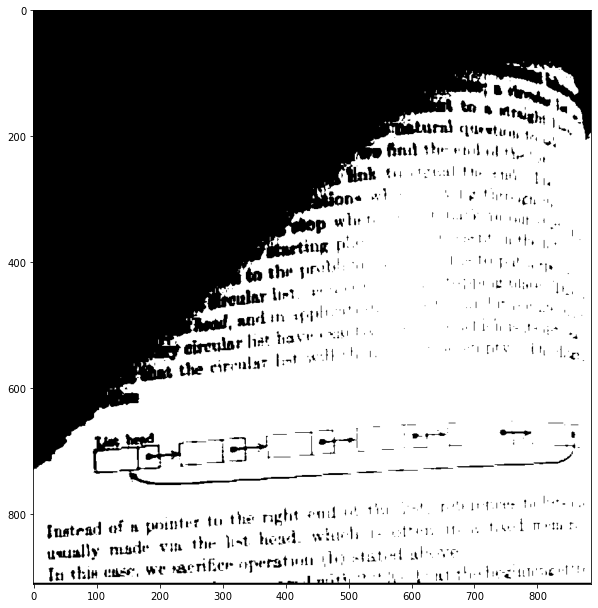

In [181]:
# Now apply Otsu's thresholding to the same images, always make sure to start with a copy of the original image
img =text_2.copy()
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,12))
plt.imshow(otsu,cmap='gray')

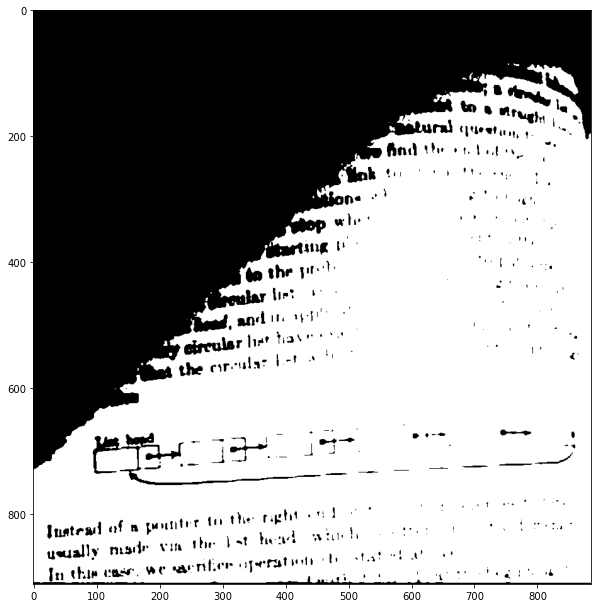

In [180]:
# Now try to first apply Gaussian Blur to the image and then Otsu thresholding
img =text_2.copy()
blur_Gauss=cv2.GaussianBlur(img,(5,5),0)
ret, otsu = cv2.threshold(blur_Gauss,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.figure(figsize=(10,12))
plt.imshow(otsu,cmap='gray')

In [ ]:
# In yesterday's notebook there was a similar challenge, with a image of a note which was very dark on the left side
# If you didn't manage to get it clean yesterday, try to go back to it now and apply what you just did here.
# Did it get better?


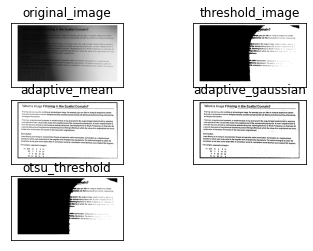

In [187]:
def threshold(img, blur=0):
    image=cv2.imread(img,0)
    
    if blur == 0:
        image =cv2.GaussianBlur(image,(5,5),0)
    elif blur==1:
        image = cv2.medianBlur(image,5)
    ret, th1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    th2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,37,4)
    
    th3= cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,31,4)
    ret1, otsu = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    images =[image,th1, th2, th3, otsu]
    
    titles =['original_image','threshold_image','adaptive_mean','adaptive_gaussian','otsu_threshold']
    
    for i in range(5):
        plt.subplot(3,2, i+1)
        plt.imshow(images[i],cmap='gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

threshold('img/notes.png', blur=0)